## Vizing Algorithm for ECol

In [3]:
import networkx as nx
import random
import matplotlib.pyplot as plt

#### Utility Functions

In [12]:
def degree(G: nx.Graph):
    if len(list(G.nodes)) <= 1: return 0
    else: return max(G.degree, key=lambda tup:tup[1])[1]


"""
    Visualizes colored graphs:
        args:   G : a graph as nx.Graph Object
                colors: number of required colors (max 20 colors accepted)
                coloring: dict with colordistribution with nodes as keys and integers as values
                pos: nx.spring_layout(G)
"""
def visualize_graph(G: nx.Graph, colors=0, coloring=None, pos=None):
    color = {0: 'b', 1: 'g', 2: 'r', 3: 'c', 4: 'm', 5: 'y',
             6: 'k', 7: 'aqua', 8: 'gold', 9: 'silver', 10: 'plum',
              11: 'purple', 12: 'ivory', 13: 'brown', 14: 'azure',
             15: 'lime',16: 'navy', 17: 'olive', 18: 'tan', 19: 'teal', 20: 'grey'}
    plt.figure(figsize=(12,6))
    nx.draw_networkx(G,pos=pos)
    for key in coloring.keys():
        c = [key[0],key[1]]
        sub = G.subgraph(c)
        nx.draw_networkx(sub,pos=pos, edge_color= color[coloring[key]], width = 5)
    plt.box(None)
    plt.show()
    
    
def shift_edges(G, u, V, a, shift='up'):
    offset = 1
    if shift == 'down': 
        offset = -1
        for i in range(1,len(V)+1):
            G[u][V[-i]]['color'] = a[i+offset]
    else:
        for i in range(len(V)):
            G[u][V[i]]['color'] = a[i+offset]
        return G


def invert_edges(G: nx.Graph, alpha: int, beta: int):
    for e in G.edges:
        u = e[0]
        v = e[1]
        if G[u][v]['color'] == alpha:
            G[u][v]['color'] = beta
        else:
            G[u][v]['color'] = alpha
    return G

### Vizing ECol

In [13]:
def ecol(G: nx.Graph):
    G_new = nx.Graph()
    G_new.add_nodes_from(list(G.nodes))
    while len(list(G.edges)) != 0:
        e = list(G.edges)[0]
        u = e[0]
        v = e[1]
        G.remove_edge(u,v)
        G_new_new = G_new.copy()
        G_new_new.add_edge(u,v)
        if degree(G_new) < degree(G_new_new):
            NGu = {G_new_new[u][y]['color'] for y in G_new_new.neighbors(u) if ((u,y) in nx.get_edge_attributes(G_new_new, 'color')) or ((y,u) in nx.get_edge_attributes(G_new_new, 'color'))}
            NGv = {G_new_new[v][y]['color'] for y in G_new_new.neighbors(v) if ((v,y) in nx.get_edge_attributes(G_new_new, 'color')) or ((y,v) in nx.get_edge_attributes(G_new_new, 'color'))}
            val = min({d for d in range(degree(G_new_new)+1)}.difference(NGu.union(NGv)))
            G_new_new[u][v]['color'] = val
        else:
            alpha, G_new_new = vizing_lemma(G_new,u,v)
            G_new_new.add_edge(u,v)
            G_new_new[u][v]['color'] = alpha
        G_new = G_new_new.copy()
    return G_new

In [14]:
def vizing_lemma(G: nx.Graph, u: int, v: int):
    alpha = {d for d in range(degree(G)+1)}.difference({G[v][y]['color'] for y in G.neighbors(v)}) # alpha fehlt an v
    beta = {d for d in range(degree(G)+1)}.difference({G[u][y]['color'] for y in G.neighbors(u)})  # beta fehlt an u
    if len(alpha.intersection(beta)) != 0:
        return min(alpha.intersection(beta)), G # v hat beta und u hat alpha
    else:
        alpha = min(alpha)
        beta = min(beta)    
    V, a, case = edge_sequence(G, u, alpha)
    if case ==1:
        G = shift_edges(G, u, V, a, shift='up')
        return alpha, G
    else:
        aj = a[-1]
        vj = [vj for vj in V if G[u][vj]['color'] == aj]
        j = [i for i in range(len(V)) if G[u][V[i]]['color'] == aj][0]
        G = shift_edges(G, u, V[:j], a[:j+1], shift='up')
        G_sub = G.subgraph([e for e in list(G.edges) if G[e[0]][e[1]]['color'] in [aj, beta]])
        if not (u in nx.node_connected_component(G_sub, vj)):
            CC_vj = G_sub.subgraph(nx.node_connected_component(G_sub, vj))
            CC_vj = invert_edges(CC_vj, aj, beta)
            return beta, G
        else:
            G = shift_edges(G, u, V[j:], a[j-1:], shift='down')
            vh = V[-1]
            ah = G[u][vh]['color']
            CC_vh = G_sub.subgraph(nx.node_connected_component(G_sub, vh))
            CC_vj = invert_edges(CC_vh, ah, beta)
            return beta, G

    
def edge_sequence(G: nx.Graph,u: int, alpha: int):
    i = 0
    V = []
    ah = -1
    a = [alpha]
    unvisited = list(G.neighbors(u))
    case = 0
    while True:
        if len(unvisited) == 0:
            case = 1
            break
        if not (a[i] in {G[u][w]['color'] for w in unvisited}):
            case = 2
            break
        w = [w for w in unvisited if G[u][w]['color'] == a[i]][0]
        V.append(w)
        unvisited.remove(w)
        a.append({d for d in range(degree(G_new_new)+1)}.difference({G[w][y]['color'] for y in G.neighbors(w)}))
        i += 1
    return V, a, case







### Algorithm inspired by Vizing Theorem
Copied and fitted to work with a networkx Graph from https://www.geeksforgeeks.org/vizings-theorem/'

In [15]:
def colorEdge(G: nx.Graph):
    edges = list(G.edges)
    e = len(G.edges)
    c = dict()
    # Initialize edge to first edge and
    # color to color 1
    i = 0
    color = 0
    # Repeat until all edges are done coloring
    while(i < e):
        # Give the selected edge a color
        c[edges[i]] = color
        flag = False
        # Iterate through all others edges to check
        for j in range(e):
            # Ignore if same edge
            if (j == i):
                continue
            # Check if one vertex is similar
            if ((edges[i][0] == edges[j][0])or
                (edges[i][1] == edges[j][0]) or
                (edges[i][0] == edges[j][1]) or
                    (edges[i][1] == edges[j][1])):
                # Check if color is similar
                if (edges[i] in c.keys()) and (edges[j] in c.keys()):
                    if (c[edges[i]] == c[edges[j]]):
                        # Increment the color by 1
                        color += 1
                        flag = True
                        break
        # If same color faced then repeat again
        if (flag == True):
            continue

        # Or else proceed to a new vertex with color 1
        color = 0
        i += 1

    # Check the maximum color from all the edge colors
    maxColor = max(c.values())
    return c, maxColor

### Analysis

In [20]:
def create_random_network(max_nodes: int)-> nx.Graph:
    n = random.randint(3,max_nodes)
    nodes = [node for node in range(n)]
    return nx.Graph([tuple(random.sample(nodes,2)) for m in range(random.randint(1,n**2))])

In [46]:
G = create_random_network(30)

Edge Coloring with Vizing Algorithm
Graph with: 11 nodes, and: 43 edges, highest degree: 10 and colored with: 10 colors. 


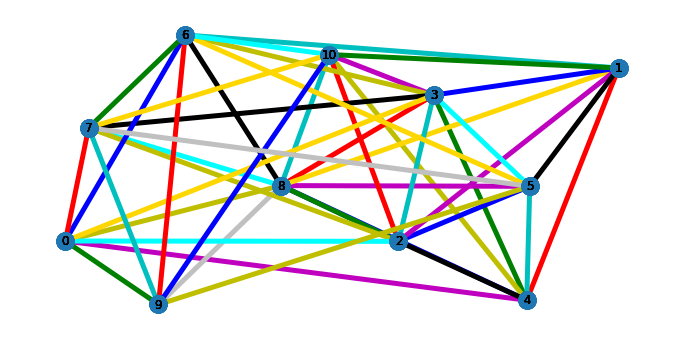

In [47]:
G_new = G.copy()
G_new = ecol(G_new)
c = nx.get_edge_attributes(G_new,'color')
maxColor = len(set(c.values()))
pos=nx.spring_layout(G_new)
print('Edge Coloring with Vizing Algorithm')
print(f'Graph with: {len(G_new.nodes)} nodes, and: {len(G_new.edges)} edges, highest degree: {degree(G_new)} and colored with: {maxColor} colors. ')
visualize_graph(G_new,maxColor,c,pos)


Edge Coloring with Github Algorithm
Graph with: 11 nodes, and: 43 edges, highest degree: 10 and colored with: 10 colors. 


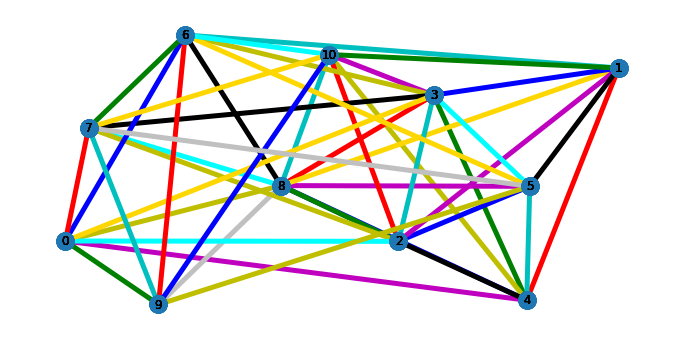

In [48]:
c, maxColor = colorEdge(G)
print('Edge Coloring with Github Algorithm')
print(f'Graph with: {len(G.nodes)} nodes, and: {len(G.edges)} edges, highest degree: {degree(G)} and colored with: {maxColor+1} colors. ')
visualize_graph(G,maxColor,c,pos)